In [1]:
import pandas as pd 
import matplotlib as plt
from scipy import stats

In [2]:
file = pd.read_csv('aefi.csv')
print(file.head())
print(file.describe())
print(file.info())
print(file.columns)
print(file.shape)
print(file.isnull().sum())
print(file.dtypes)

         date      vaxtype  daily_total  daily_serious_npra  daily_nonserious  \
0  2021-01-13  astrazeneca            5                   0                 5   
1  2021-02-25       pfizer            1                   0                 1   
2  2021-02-26       pfizer            2                   0                 2   
3  2021-02-27       pfizer            4                   0                 4   
4  2021-02-28       pfizer           12                   1                11   

   daily_nonserious_npra  daily_nonserious_mysj_dose1  \
0                      5                            0   
1                      1                            0   
2                      2                            0   
3                      4                            0   
4                     11                            0   

   daily_nonserious_mysj_dose2  d1_site_pain  d1_site_swelling  ...  \
0                            0             0                 0  ...   
1                           

In [3]:
# check for duplicates
duplicates = file.duplicated()
print(duplicates.sum())

0


In [4]:
# check for null values
null_values = file.isnull().sum()
print(null_values)

date                           0
vaxtype                        0
daily_total                    0
daily_serious_npra             0
daily_nonserious               0
daily_nonserious_npra          0
daily_nonserious_mysj_dose1    0
daily_nonserious_mysj_dose2    0
d1_site_pain                   0
d1_site_swelling               0
d1_site_redness                0
d1_tiredness                   0
d1_headache                    0
d1_muscle_pain                 0
d1_joint_pain                  0
d1_weakness                    0
d1_fever                       0
d1_vomiting                    0
d1_chills                      0
d1_rash                        0
d2_site_pain                   0
d2_site_swelling               0
d2_site_redness                0
d2_tiredness                   0
d2_headache                    0
d2_muscle_pain                 0
d2_joint_pain                  0
d2_weakness                    0
d2_fever                       0
d2_vomiting                    0
d2_chills 

In [5]:
# check for all features
features = file.columns
print(features)

Index(['date', 'vaxtype', 'daily_total', 'daily_serious_npra',
       'daily_nonserious', 'daily_nonserious_npra',
       'daily_nonserious_mysj_dose1', 'daily_nonserious_mysj_dose2',
       'd1_site_pain', 'd1_site_swelling', 'd1_site_redness', 'd1_tiredness',
       'd1_headache', 'd1_muscle_pain', 'd1_joint_pain', 'd1_weakness',
       'd1_fever', 'd1_vomiting', 'd1_chills', 'd1_rash', 'd2_site_pain',
       'd2_site_swelling', 'd2_site_redness', 'd2_tiredness', 'd2_headache',
       'd2_muscle_pain', 'd2_joint_pain', 'd2_weakness', 'd2_fever',
       'd2_vomiting', 'd2_chills', 'd2_rash'],
      dtype='object')


In [6]:
# drop features
file.drop(['daily_total','daily_nonserious','daily_nonserious_mysj_dose1',
       'daily_nonserious_mysj_dose2','d1_site_swelling',
       'd1_site_redness', 'd1_tiredness', 'd1_muscle_pain',
       'd1_joint_pain', 'd1_weakness', 'd1_vomiting', 'd1_chills',
       'd1_rash',  'd2_site_swelling', 'd2_site_redness',
       'd2_tiredness','d2_muscle_pain', 'd2_joint_pain',
       'd2_weakness', 'd2_vomiting', 'd2_chills', 'd2_rash'], axis=1, inplace=True)
print(file.columns)

Index(['date', 'vaxtype', 'daily_serious_npra', 'daily_nonserious_npra',
       'd1_site_pain', 'd1_headache', 'd1_fever', 'd2_site_pain',
       'd2_headache', 'd2_fever'],
      dtype='object')


In [7]:
# drop the date column
file.drop('date', axis=1, inplace=True)
print(file.head())


       vaxtype  daily_serious_npra  daily_nonserious_npra  d1_site_pain  \
0  astrazeneca                   0                      5             0   
1       pfizer                   0                      1             0   
2       pfizer                   0                      2             0   
3       pfizer                   0                      4             0   
4       pfizer                   1                     11             0   

   d1_headache  d1_fever  d2_site_pain  d2_headache  d2_fever  
0            0         0             0            0         0  
1            0         0             0            0         0  
2            0         0             0            0         0  
3            0         0             0            0         0  
4            0         0             0            0         0  


In [8]:
# check number of vaxtype in vaxtype column
print(file['vaxtype'].nunique())

# print out the vaxtype name
vaxtype_name = file['vaxtype'].unique()
print(vaxtype_name)

4
['astrazeneca' 'pfizer' 'sinovac' 'sinopharm']


In [9]:
# convert the vaxtype colummn from category to numerical
file['vaxtype'] = file['vaxtype'].astype('category')
file['vaxtype'] = file['vaxtype'].cat.codes
print(file.head())

   vaxtype  daily_serious_npra  daily_nonserious_npra  d1_site_pain  \
0        0                   0                      5             0   
1        1                   0                      1             0   
2        1                   0                      2             0   
3        1                   0                      4             0   
4        1                   1                     11             0   

   d1_headache  d1_fever  d2_site_pain  d2_headache  d2_fever  
0            0         0             0            0         0  
1            0         0             0            0         0  
2            0         0             0            0         0  
3            0         0             0            0         0  
4            0         0             0            0         0  


AttributeError: module 'matplotlib' has no attribute 'title'

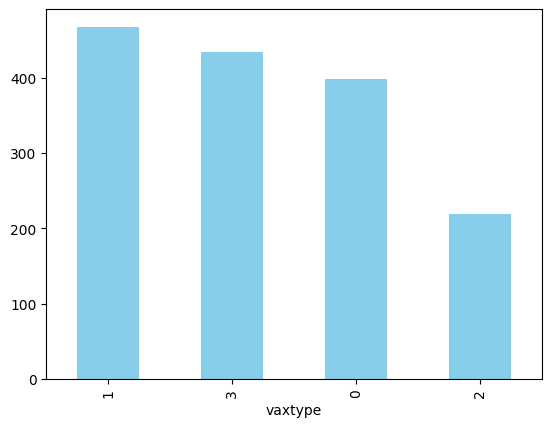

In [10]:
# check frequency of vaxtype column and show in graph of frequency vs vaxtype
vaxtype_freq = file['vaxtype'].value_counts()
# Plot the frequency using a bar chart
vaxtype_freq.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Frequency of Vaccine Types')
plt.xlabel('Vaccine Type')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [46]:
# Do Variance inflation factor to check for multicollinearity
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(vif)

print(calculate_vif(file))


               variables        VIF
0                vaxtype   1.249342
1     daily_serious_npra   2.751387
2  daily_nonserious_npra   2.573962
3           d1_site_pain  33.369977
4            d1_headache  89.572161
5               d1_fever  26.123000
6           d2_site_pain  37.577448
7            d2_headache  23.873921
8               d2_fever  22.325027


<Axes: >

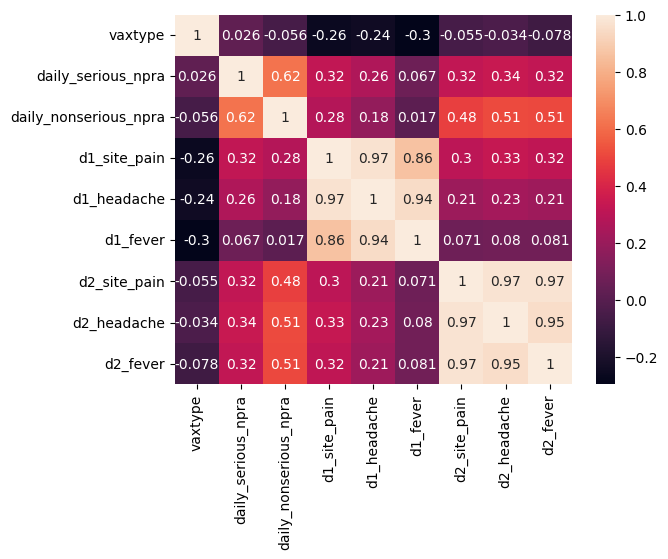

In [47]:
import seaborn as sns

# Check the correlation between all the columns in the dataframe
sns.heatmap(file.corr(), annot=True)

In [48]:
# check for data balance with SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter


                        vaxtype  daily_serious_npra  daily_nonserious_npra  \
vaxtype                1.000000            0.026468              -0.056364   
daily_serious_npra     0.026468            1.000000               0.617329   
daily_nonserious_npra -0.056364            0.617329               1.000000   
d1_site_pain          -0.256101            0.320326               0.277153   
d1_headache           -0.240623            0.264376               0.184878   
d1_fever              -0.295282            0.067462               0.017488   
d2_site_pain          -0.055163            0.320562               0.481361   
d2_headache           -0.033947            0.338055               0.511089   
d2_fever              -0.077986            0.317116               0.508994   

                       d1_site_pain  d1_headache  d1_fever  d2_site_pain  \
vaxtype                   -0.256101    -0.240623 -0.295282     -0.055163   
daily_serious_npra         0.320326     0.264376  0.067462      0.3

In [12]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
import numpy as np

# Load the CSV directly from the URL
url = "https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/aefi.csv"
data = pd.read_csv(url)

# Convert the 'date' column to datetime, allowing mixed formats
data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')

# Define the date range
start_date = '2021-04-15'
end_date = '2021-10-15'

# Filter the data within the specified date range
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Keep only the required columns
columns_to_keep = [
    'vaxtype', 'daily_total', 'daily_serious_npra', 'daily_nonserious_npra', 
    'd1_site_pain', 'd2_site_pain', 'd1_fever', 'd2_fever', 
    'd1_headache', 'd2_headache', 'd1_muscle_pain', 'd2_muscle_pain'
]
filtered_data = filtered_data[columns_to_keep]

# =============================
# Data Preprocessing
# =============================

# 1. Handle Missing Data: Drop rows with missing values in 'vaxtype' and other columns
filtered_data = filtered_data.dropna()

# 2. Feature Scaling: Apply standardization (Z-score normalization) to the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(filtered_data.drop(columns='vaxtype'))

# 3. Handle Outliers: Remove rows that are outliers using Z-score
z_scores = np.abs(stats.zscore(scaled_features))
filtered_data = filtered_data[(z_scores < 3).all(axis=1)]

# Separate the filtered data after outlier removal into X and y again
X = filtered_data.drop(columns='vaxtype')
y = filtered_data['vaxtype']

# Re-apply scaling after outlier removal
X_scaled = scaler.fit_transform(X)

# 4. Encode the target labels (vaccine types) to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# =============================
# Part 1: Hyperparameter Tuning (No change needed)
# =============================

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to try
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up GridSearchCV to search for the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Train the model with different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# =============================
# Part 2: Train Final Model with Best Parameters and K-Fold Cross-Validation
# =============================

# Initialize the KNN model with the best parameters
knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])

# Perform K-Fold cross-validation
k = 10
cv_scores = cross_val_score(knn_best, X_scaled, y_encoded, cv=k, scoring='accuracy')

# Print out the accuracy for each fold and the mean accuracy
print(f"Cross-validation accuracies for {k} folds: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

# =============================
# Part 3: Final Evaluation on Test Data
# =============================

# Train the model on the entire training dataset
knn_best.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_best.predict(X_test)

# Calculate the accuracy of the final model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Model Test Accuracy: {accuracy * 100:.2f}%")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


C:\Users\cheng\AppData\Local\Temp\ipykernel_2316\2569278267.py:14: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Cross-validation accuracies for 10 folds: [0.81632653 0.75510204 0.71428571 0.71428571 0.83673469 0.87755102
 0.7755102  0.79591837 0.87755102 0.81632653]
Mean cross-validation accuracy: 79.80%

Final Model Test Accuracy: 88.78%

Classification Report:
              precision    recall  f1-score   support

 astrazeneca       0.97      0.94      0.95        33
      pfizer       0.86      0.86      0.86        29
     sinovac       0.84      0.86      0.85        36

    accuracy                           0.89        98
   macro avg       0.89      0.89      0.89        98
weighted avg       0.89      0.89      0.89        98

